In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Enable altair's interactive visualization in jupyter notebook
alt.renderers.enable('notebook')
# Enable altair's local data server so notebook size doesn't get too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [4]:
df = pd.read_csv('data/master.csv')

In [8]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [5]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

In [6]:
summer_medal = summer_df[summer_df['Medal'].notnull()]

In [24]:
summer_medal_sorted = summer_medal.groupby(['Name', 'region'])['Medal'].size().reset_index(name='count_medals').sort_values(by='count_medals', ascending=False)
summer_medal_sorted.head(10)

,Name,region,count_medals
15807,"Michael Fred Phelps, II",USA,28
13378,Larysa Semenivna Latynina (Diriy-),Russia,18
16936,Nikolay Yefimovich Andrianov,Russia,15
5294,Edoardo Mangiarotti,Italy,13
21300,Takashi Ono,Japan,13
2778,Borys Anfiyanovych Shakhlin,Russia,13
4421,"Dara Grace Torres (-Hoffman, -Minas)",USA,12
19794,Ryan Steven Lochte,USA,12
20089,Sawao Kato,Japan,12
16552,Natalie Anne Coughlin (-Hall),USA,12


In [25]:
summer_medal_top = summer_medal_sorted.head(25)

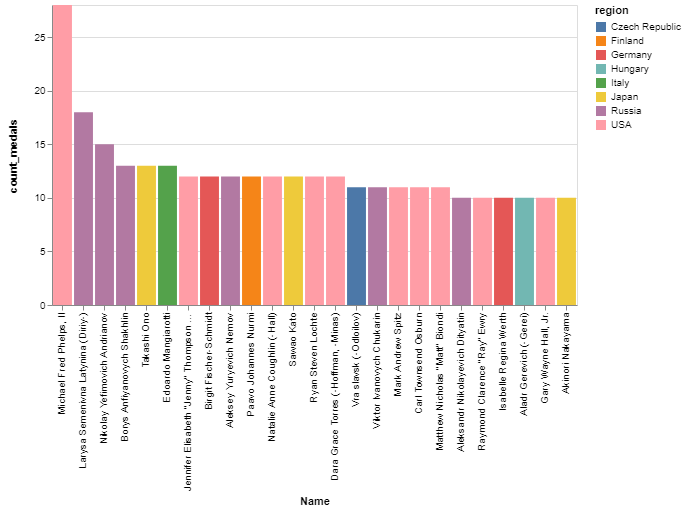

In [34]:
alt.Chart(summer_medal_top).mark_bar().encode(
    alt.X('Name:N', sort=alt.Sort(field='count_medals', op='sum', order='descending')),
    alt.Y('count_medals:Q'),
    alt.Color('region:N')
)

basketball_medal = summer_medal[summer_medal['Sport'] == 'Basketball']

In [ ]:
alt.Chart(basketball_medal).mark_rect().encode(
    alt.Y('region:N'),
    alt.X('Year:O'),
    color=('Medal:N')
)